In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
#from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')     

In [2]:
winedf = pd.read_csv("D:\Amir Ali\Data Science\Datasets\DSData-master\winequality-red.csv")
winedf
#I wasnt able to download dataset from git hub using "Raw" I tried other method to download zip file.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
winedf.shape #however shape was clear in the above line I would like to continue to check for better practice

(1599, 12)

In [4]:
winedf.head() #lets check top 5 rowa
#we can use ".tail" to check bottom 5 rows as well

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
winedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
winedf.dtypes #again we have already check the datatype using info method.

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
winedf.isnull().sum() #as we have already check there is no null values in the dataset using info method

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We can see all the independent variable are in continous data, where target y lable or dependent variable is in descret value

In [8]:
winedf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


coutn = We can see the count of filled data or not NaN data

mean = mean value of the given coulomns

std = standar deviation

min = minimum of numbers

25% = 1st quartile of the data or 25% percentile of the data

50% = Meadian of the data

75% = 3rd quartile of the data or 75% percentile of the data

max = maximum of numbers


In [9]:
#lets check the relation of independent variable to dependent variable
winedf.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

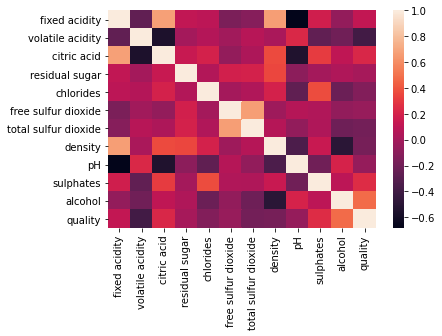

In [10]:
#to make it more clear lets use heatmap from seaborn
sns.heatmap(winedf.corr())

<AxesSubplot:>

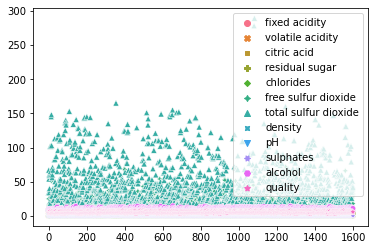

In [11]:
#scatter plot also can help us to check the correlation between variables
sns.scatterplot(data = winedf)

<AxesSubplot:xlabel='quality', ylabel='count'>

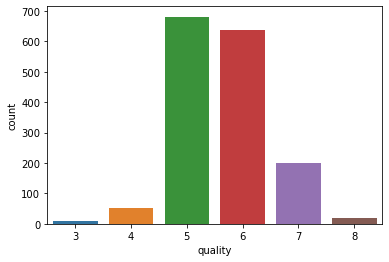

In [12]:
sns.countplot(winedf['quality'])

In [13]:
#We can see 5 and 6 are the most number appear in the quality index
#where 3 and 8 are very less, we can say its imbalanced data

# SMOTE

lets apply Synthetic Minority Over_sampling technique to make it balance

In [14]:
import sklearn
sklearn.__version__
#we can only install imbalance if we have 0.24 version of sklearn

'0.24.2'

In [15]:
#pip install scikit-learn==0.24.2

In [16]:
import numpy
numpy.__version__
#We can install imbalance if we have 1.19 version of numpy

'1.19.2'

#Lets import imbalance learn

In [17]:
#pip install imbalanced-learn

In [18]:
#conda install -c conda-forge imbalanced-learn

In [19]:
from imblearn.over_sampling import SMOTE

# We need to use classification model to determine the correct lables

Lets first divide data into dependent and independent data

In [21]:
x = winedf.iloc[:,0:-1] # all the rows from 0 to all except last "-1"
y = winedf.iloc[:,-1] # only last row 

In [20]:
# Lets import some important libraries
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
#lets train the model
#x_train, y_train, x_test, y_test = train_test_split(x,y, test_size = .25, random_state = 45)
#Data should be split into two parts with two variables, 

In [23]:
#lets check shape of the variables
# print(x_train.shape)
# print(x_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [24]:
smt = SMOTE() # to balance the data we need to use SMOTE
smote_x, smote_y = smt.fit_resample(x, y)

In [25]:
smote_x.count()

fixed acidity           4086
volatile acidity        4086
citric acid             4086
residual sugar          4086
chlorides               4086
free sulfur dioxide     4086
total sulfur dioxide    4086
density                 4086
pH                      4086
sulphates               4086
alcohol                 4086
dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

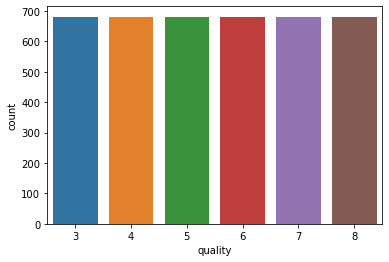

In [26]:
sns.countplot(smote_y)

Its clearly visible that data is blanced

In [27]:
train_sx, test_sx, train_sy, test_sy = train_test_split(smote_x, smote_y, test_size = .30, random_state =45)

In [28]:
train_sx.count()

fixed acidity           2860
volatile acidity        2860
citric acid             2860
residual sugar          2860
chlorides               2860
free sulfur dioxide     2860
total sulfur dioxide    2860
density                 2860
pH                      2860
sulphates               2860
alcohol                 2860
dtype: int64

In [29]:
test_sx.count()

fixed acidity           1226
volatile acidity        1226
citric acid             1226
residual sugar          1226
chlorides               1226
free sulfur dioxide     1226
total sulfur dioxide    1226
density                 1226
pH                      1226
sulphates               1226
alcohol                 1226
dtype: int64

In [30]:
from sklearn.linear_model           import LogisticRegression
from sklearn.tree                   import DecisionTreeClassifier
from sklearn.metrics                import confusion_matrix

In [31]:
#lets make instance for DecisionTreeClassifier


dtc = DecisionTreeClassifier()
#lets fit the data into the model
dtc.fit(train_sx, train_sy)

pred = dtc.predict(test_sx)
from sklearn.metrics import accuracy_score
print("Accuracy :: ", accuracy_score(test_sy, pred))
confusion_matrix(test_sy, pred)

Accuracy ::  0.7814029363784666


array([[210,   4,   5,   1,   0,   0],
       [  1, 167,  15,  13,   0,   0],
       [  2,  31, 118,  40,   7,   1],
       [  5,  13,  27, 112,  47,   3],
       [  0,   3,   5,  19, 160,  13],
       [  0,   0,   1,   3,   9, 191]], dtype=int64)

# Tuning the model: Hyperparameter tuning : GridSearchCV

In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

#lets create and fit Ridge Regression model testing each alpha
alphavalue = {'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model = Ridge()

grid = GridSearchCV(estimator = model, param_grid = alphavalue)

grid.fit(smote_x,smote_y)
print(grid)

#lets summarize the results of the grid search

print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)



GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})
-3.5961202644312635
0
{'alpha': 0}


In [34]:
rd = Ridge(alpha = 0.1)
rd.fit(smote_x,smote_y)
print(rd.coef_)
print('Score: ',rd.score(smote_x, smote_y))

[-1.09129299e-01 -2.24224872e+00  1.39777968e-01 -7.33788289e-02
 -7.38552365e+00  5.16170185e-03 -1.64402913e-03  3.86458330e-01
 -3.26953504e+00  1.70819698e+00  6.64630848e-01]
Score:  0.7419740975867575


In [39]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

sv = svm.SVC(kernel = 'linear', C = 1)
sv.fit(smote_x,smote_y)
t = sv.score(smote_x,smote_y)
print(round(t,2))

0.58


In [40]:
# For DTC we have "Criterion" where we check on 'gini' and 'entrophy'
dtc = DecisionTreeClassifier()

gd_pa = { 'criterion': ['gini', 'entrophy']}

gd_sr = GridSearchCV(estimator = dtc, param_grid = gd_pa, scoring = 'accuracy', cv =5)

gd_sr.fit(smote_x,smote_y)

print("best_paramenters : ", gd_sr.best_params_)
print("best result : ", gd_sr.best_score_)
print(round(gd_sr.best_score_, 2))

best_paramenters :  {'criterion': 'gini'}
best result :  0.7332305859890529
0.73


In [41]:
dtc = DecisionTreeClassifier(criterion = 'gini')
dtc.fit(smote_x,smote_y)
dtc.score(smote_x,smote_y)

1.0

# ROC curve and the AUC value

AUC ROC are graphical representation of confusion matrix

In [42]:
dt = DecisionTreeClassifier()
dt.fit(train_sx, train_sy)
p = dt.predict(test_sx)

ac = accuracy_score(test_sy, p)
round(ac, 2)

0.78

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [47]:
# decision tree curve

fpr = dict()
tpr = dict()
roc_auc = dict()
y_pred_prob = dt.predict_proba(test_sx)
fpr,tpr,thresholds = roc_curve(test_sy, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr,tpr,lable = 'Decision Tree Classifire')
plt.xlable("False positive rate")
plt.ylable("True positive rate") 
plt.title('Decision Tree Classifier')
plt.show()
auc_score = roc_auc_score(test_sy, dt.predict(test_sx))
auc_score

ValueError: multiclass format is not supported